Combined Cycle Power Plant - Multiple Linear Regression
The "Combined Cycle Power Plant" dataset contains the following features (variables):

Temperature (T): The temperature measured in °C.

Ambient Pressure (AP): The ambient pressure measured in millibars.

Relative Humidity (RH): The relative humidity measured in percent.

Exhaust Vacuum (V): The exhaust vacuum measured in cm Hg.

Electrical Energy Output (PE): The electrical energy output of the power plant measured in MW.

These features are used to estimate the electrical energy output of a combined cycle power plant. Each instance in the dataset represents a specific combination of these features and the corresponding electrical energy output.


Importing libraries and review of data.


In [5]:
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn import model_selection

Load appropriate dataset and verify if loading is correct.

In [3]:
import warnings
warnings.filterwarnings('ignore')

##Importing dataset##


In [6]:
# Load the dataset
#Loading the dataset and explores its structure

## Download the file from Google Drive
# Downloaded file is stored as local_file
output = 'local_file.csv'
gdown.download(f'https://drive.google.com/uc?id=14dJ_A8BmMTs3WrQvau7dNyI8T3SmbUFm', output, quiet=False)

# Reading file into a pandas DataFrame
dataset = pd.read_csv(output)
X = dataset.iloc[:, :-1].values
y=  dataset.iloc[:, -1].values
dataset.head()

Downloading...
From: https://drive.google.com/uc?id=14dJ_A8BmMTs3WrQvau7dNyI8T3SmbUFm
To: /content/local_file.csv
100%|██████████| 318k/318k [00:00<00:00, 61.2MB/s]


,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


##Statistics of Datasheet


In [8]:
print(dataset.describe())

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


##Checking NULL Values

In [11]:
dataset.isnull().sum()*100/dataset.shape[0]

AT    0.0
V     0.0
AP    0.0
RH    0.0
PE    0.0
dtype: float64

#There are no null values

##Plots

#Histogram


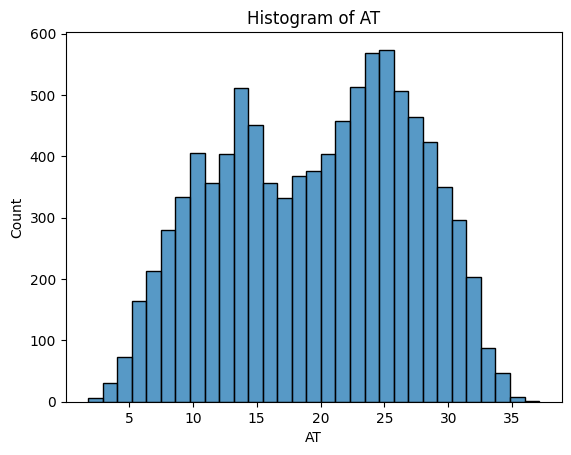

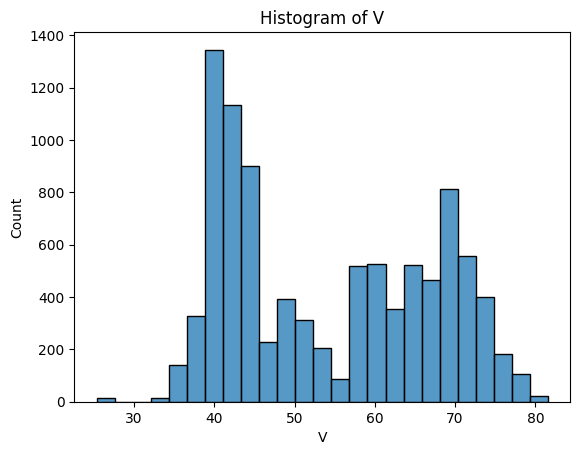

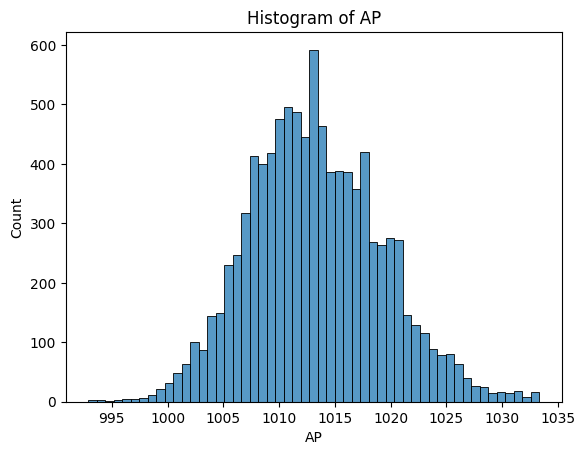

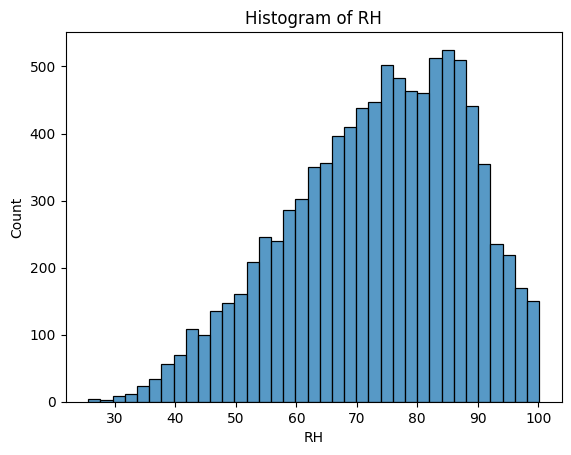

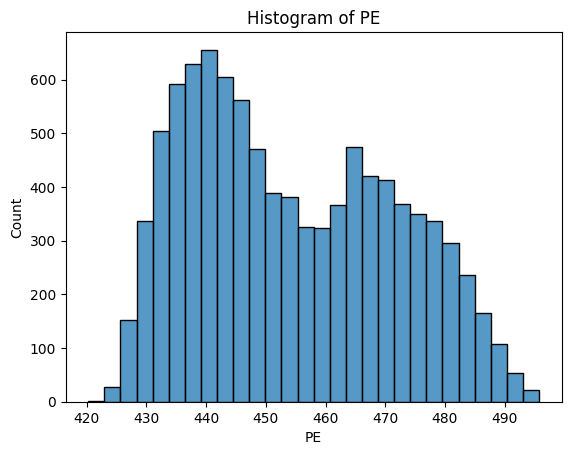

In [12]:
# Selecting variables
variables = ["AT", "V", "AP", "RH", "PE"]

# Creating histograms
for var in variables:
  sns.histplot(data = dataset, x = var)
  plt.title("Histogram of {}".format(var))
  plt.show()

#Box Plots

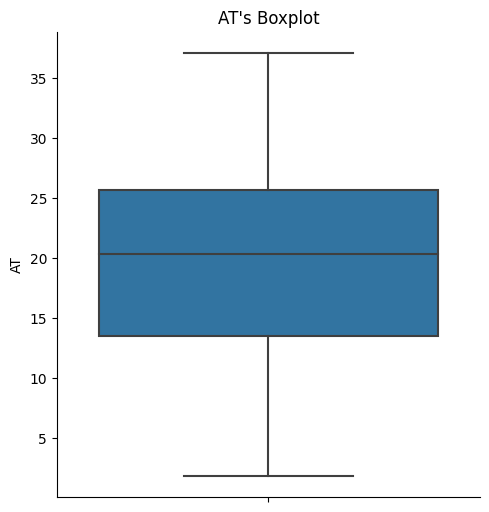

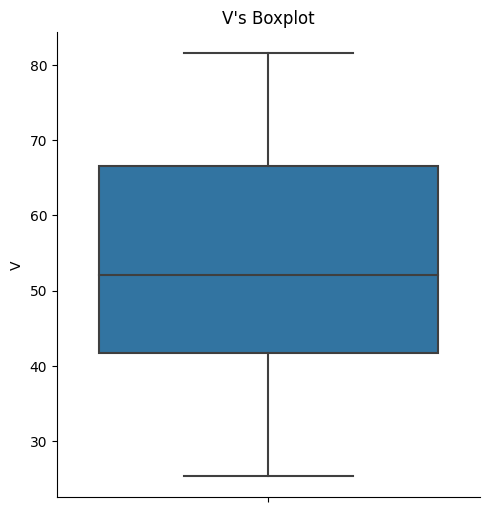

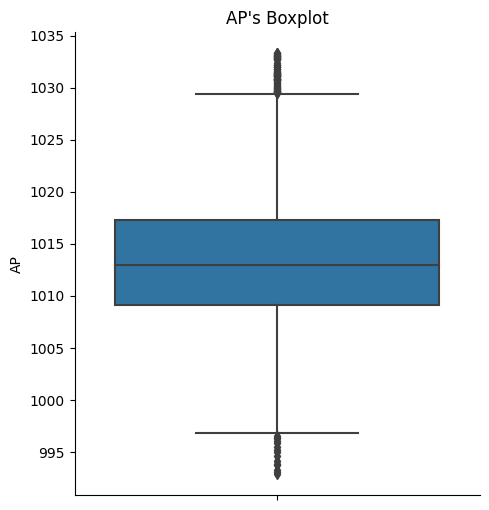

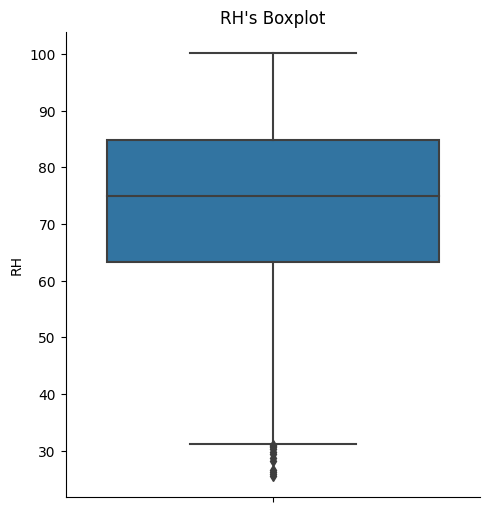

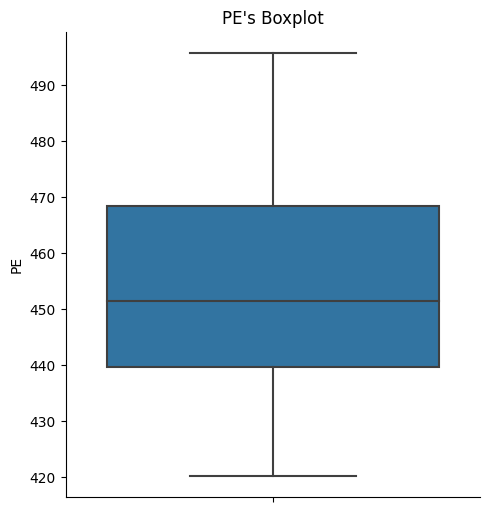

In [19]:
for var in variables:
  sns.catplot(data=dataset, y = var, kind = "box")
  plt.title("{}'s Boxplot".format(var))
  plt.show()

It can be observed that AP and RH have higher number of outliers


A pair plot provides a grid of scatter plots between each one of the variables

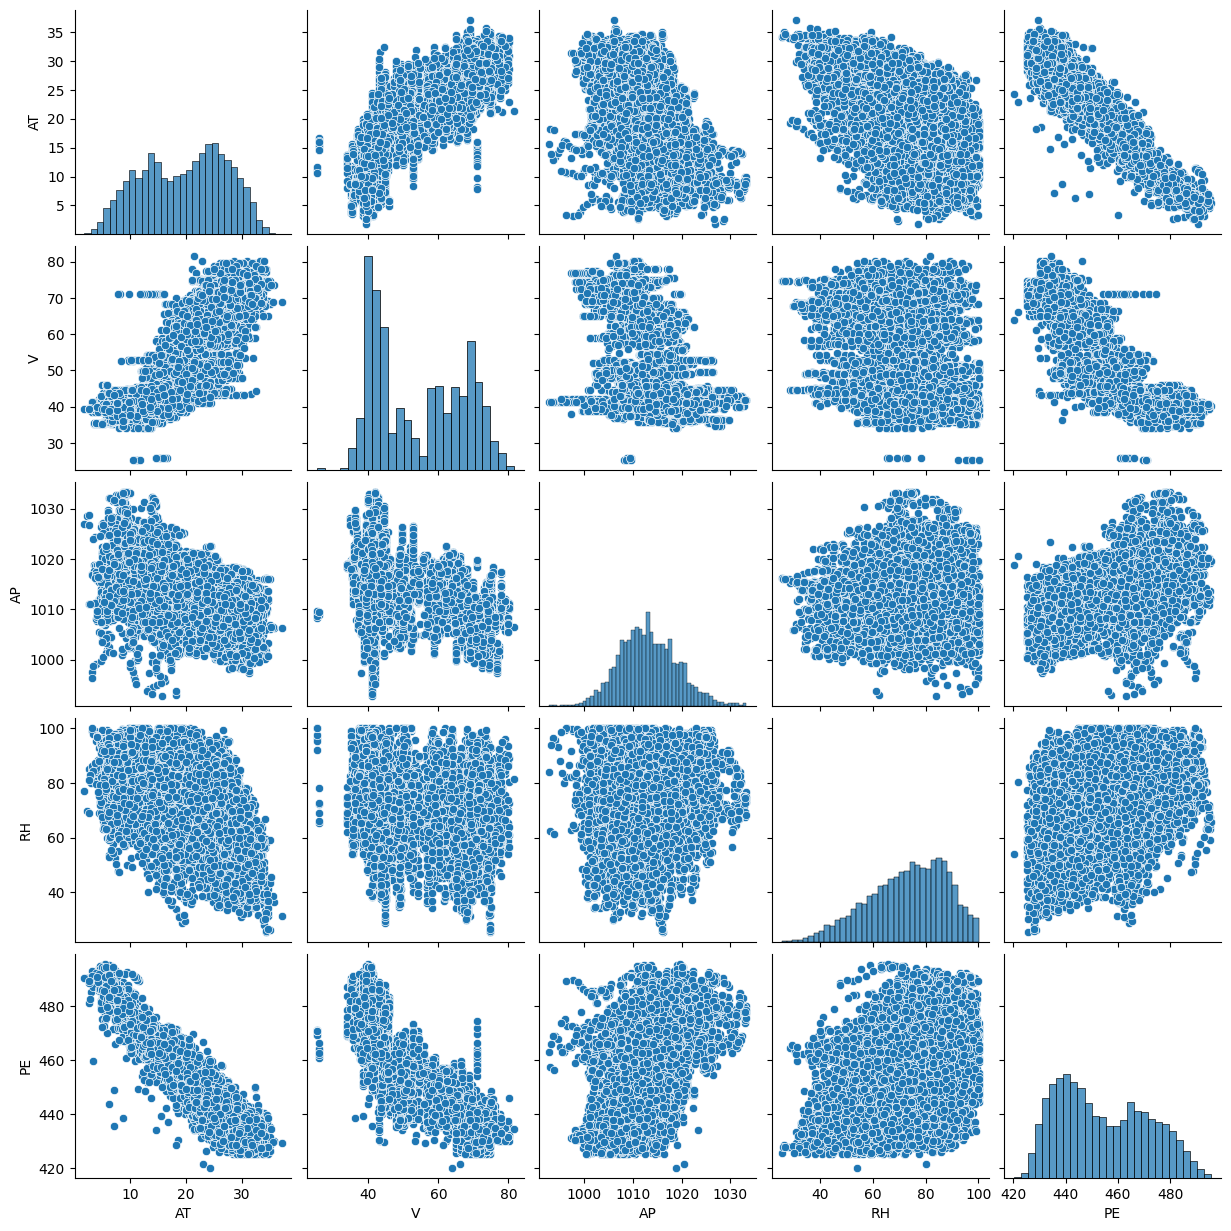

In [21]:
sns.pairplot(dataset)
plt.show()

AT and V have more linear relation with PE

A corellation heat map is useful to visualize multicollinearity

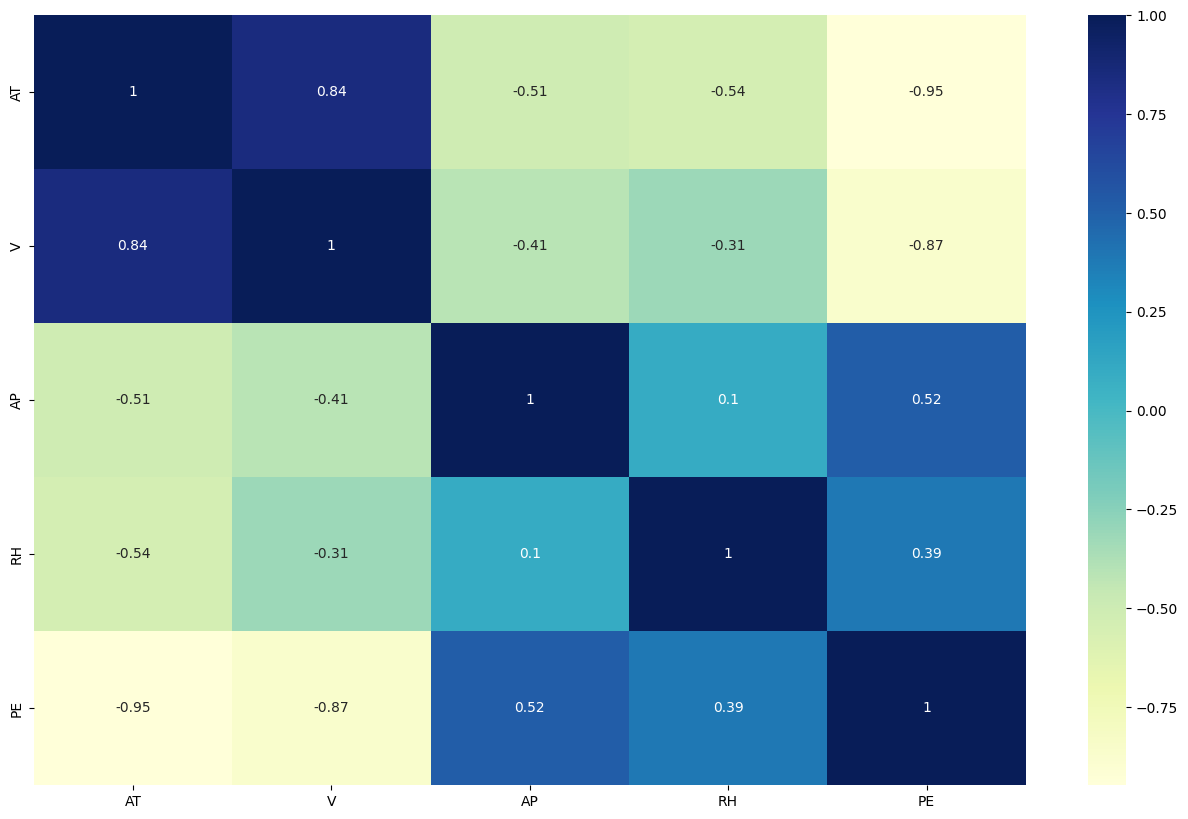

In [22]:
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()

High Colinearity can be observed betwen AT and V

A distplot plot is a univariate distribution of observations. Distplot provides a combination of histogram and kde plot


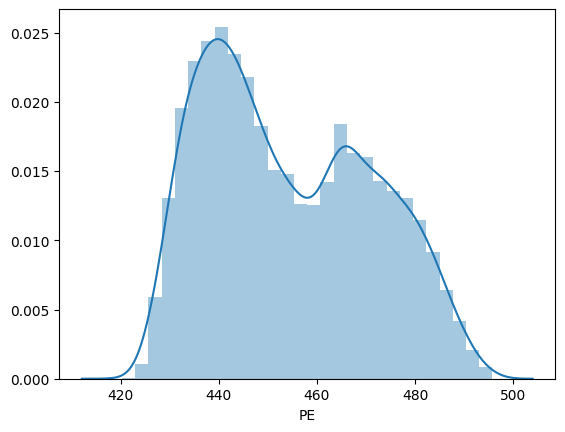

In [24]:
sns.distplot(dataset['PE'])
plt.xlabel("PE")
plt.ylabel("")
plt.show()

Violin Plots

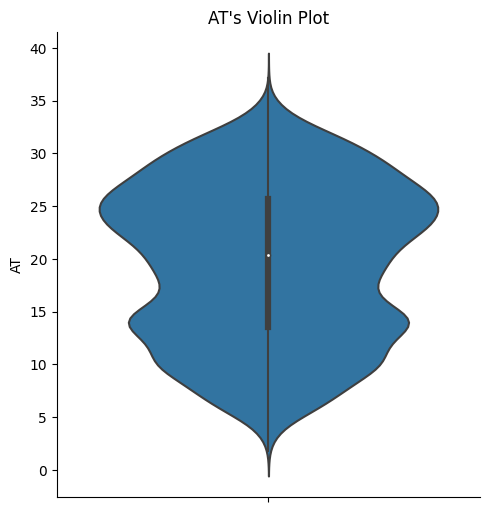

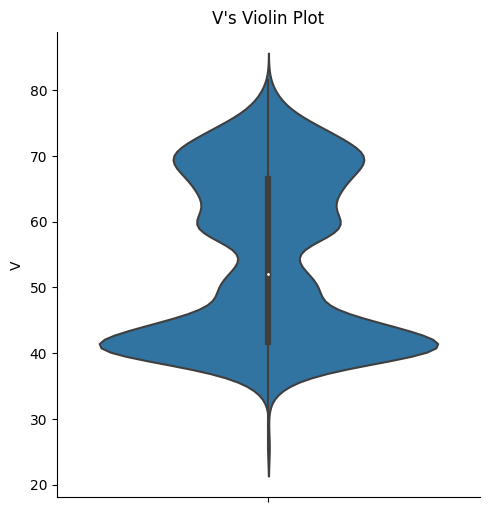

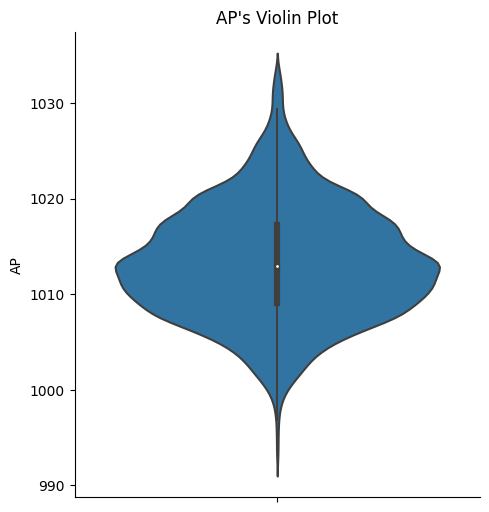

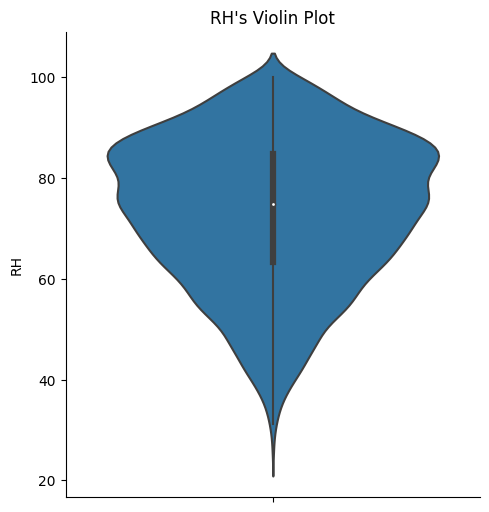

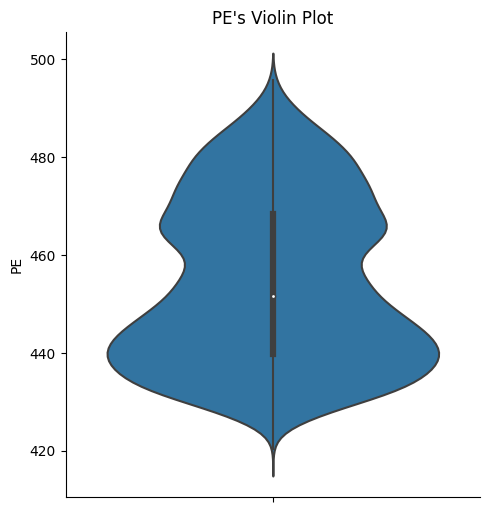

In [28]:
# Violin Plots
for var in variables:
  sns.catplot(data=dataset, y = var, kind = "violin")
  plt.title("{}'s Violin Plot".format(var))
  plt.show()

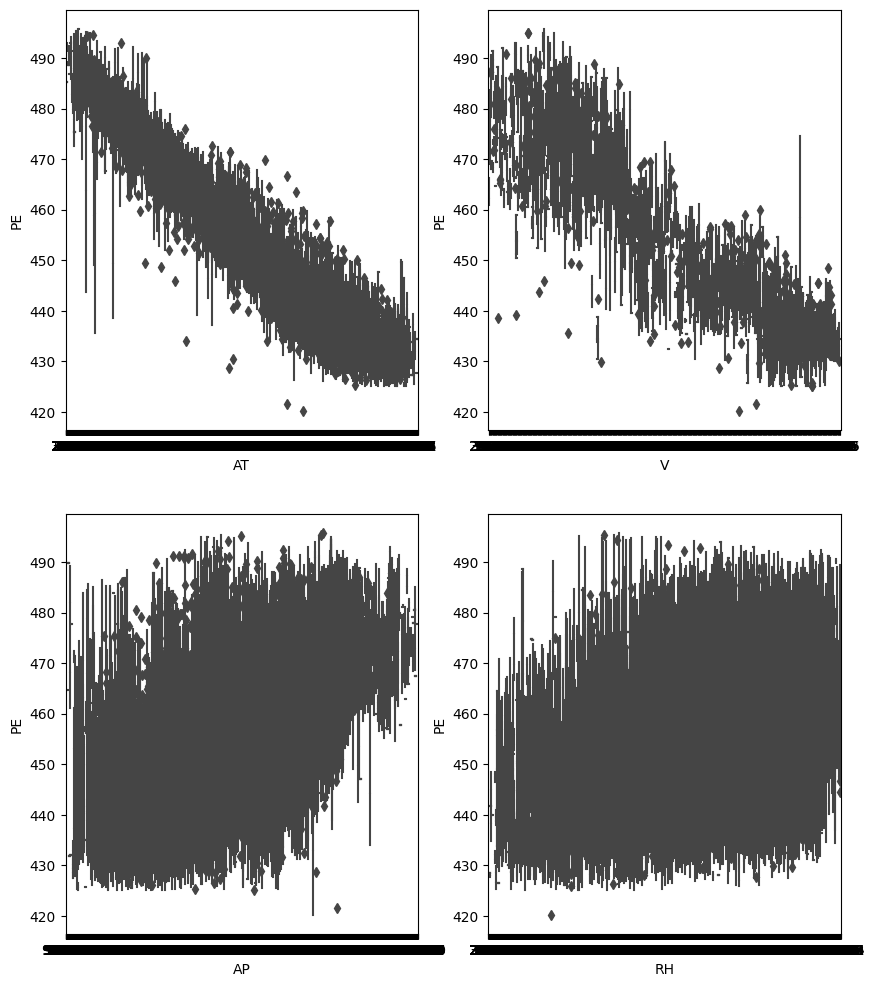

In [26]:
plt.figure(figsize=(10, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'AT', y = 'PE', data = dataset)
plt.subplot(2,2,2)
sns.boxplot(x = 'V', y = 'PE', data = dataset)
plt.subplot(2,2,3)
sns.boxplot(x = 'AP', y = 'PE', data = dataset)
plt.subplot(2,2,4)
sns.boxplot(x = 'RH', y = 'PE', data = dataset)

plt.show()

##Splitting the dataset into the Training and Test sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

Here I have taken train size is of 80% and test size is 20%

##Training the model on Training set

In [35]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## Prediction of Test set results

In [30]:
y_pred = lm.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[433.36 426.18]
 [448.39 451.1 ]
 [445.89 442.87]
 ...
 [456.06 454.2 ]
 [446.91 444.13]
 [432.57 436.58]]


##Evaluating the Model Performance for R-squared value

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9298994694436788

## Model details like Coefficents and Intercepts

In [40]:


# Add a constant term to the feature matrix for the intercept
X_with_intercept = sm.add_constant(X)

# Fit the linear regression model
lm_statsmodels = sm.OLS(y, X_with_intercept).fit()

# Print the summary
print(lm_statsmodels.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:44:46   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

array([ 4.55e+02, -1.98e+00, -2.34e-01,  6.21e-02, -1.58e-01])

In [41]:
# Coefficients and intercept
coefficients_statsmodels = lm_statsmodels.params
intercept_statsmodels = lm_statsmodels.params[0]  # If you added a constant term

print("Coefficients:", coefficients_statsmodels)
print("Intercept:", intercept_statsmodels)

Coefficients: [ 4.55e+02 -1.98e+00 -2.34e-01  6.21e-02 -1.58e-01]
Intercept: 454.60927431531195
